In [1]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample, resample_poly

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

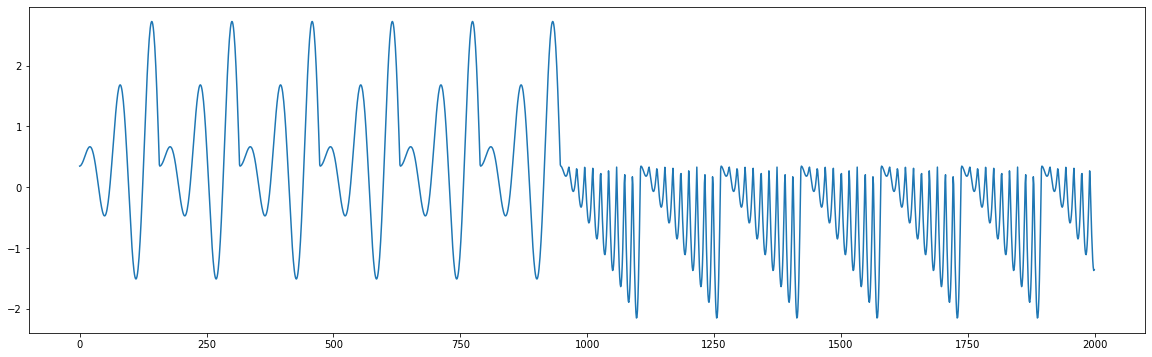

In [2]:
df = pd.read_csv("https://zenodo.org/record/4662217/files/snippets.csv?download=1")
plt.plot(df)
plt.show()

In [3]:
def warp_add_noise(T):
    T = np.asarray(T).flatten()
    idx = np.arange(T.shape[0])
    np.random.shuffle(idx)
    idx = np.sort(idx[:-np.floor(T.shape[0] * 0.1).astype(int)])
    warped_T = resample_poly(T[idx], T.shape[0], idx.shape[0])
    noise = np.random.normal(0, 0.05, warped_T.shape)
    return warped_T + noise

In [4]:
T = warp_add_noise(df)
m = 200
k = 2
s = 70

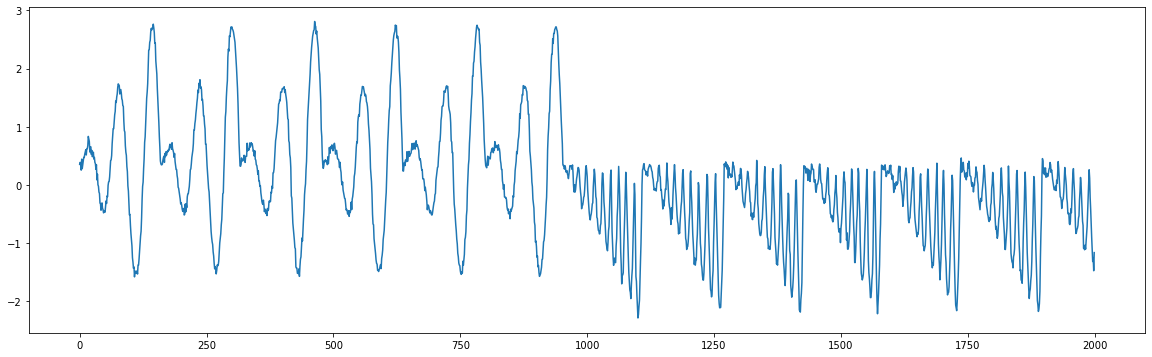

In [5]:
plt.plot(T)
plt.show()

In [6]:
snippets, indices, profiles, fractions, areas = stumpy.snippets(T, m, k, s=s)

(1801,)


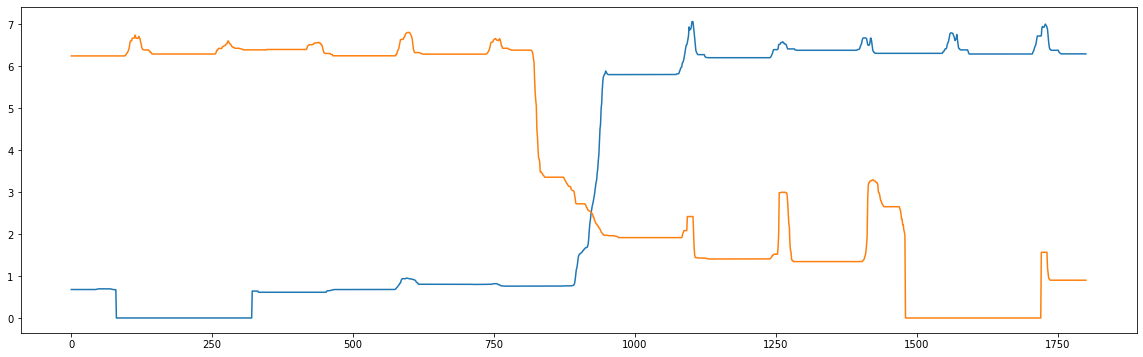

In [7]:
print(profiles[0].shape)
plt.plot(profiles.T)
plt.show()

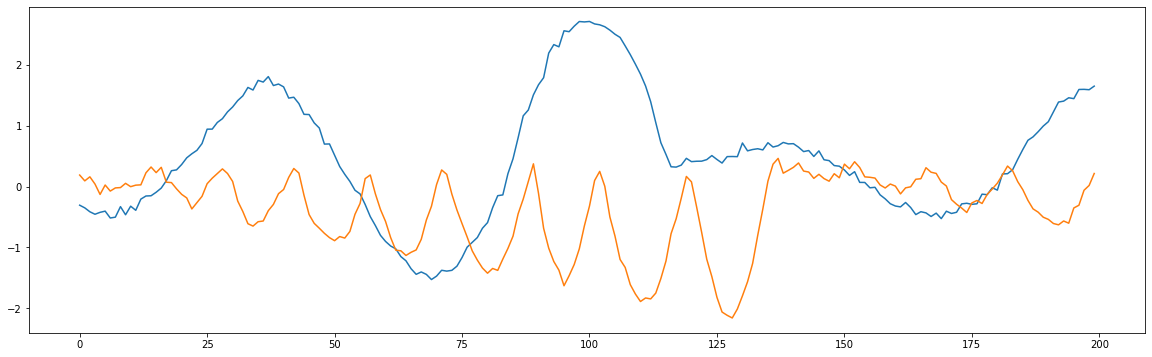

In [8]:
plt.plot(snippets.T)
plt.show()

In [9]:
indices

array([ 200, 1600])

In [10]:
fractions

array([0.51249306, 0.48750694])

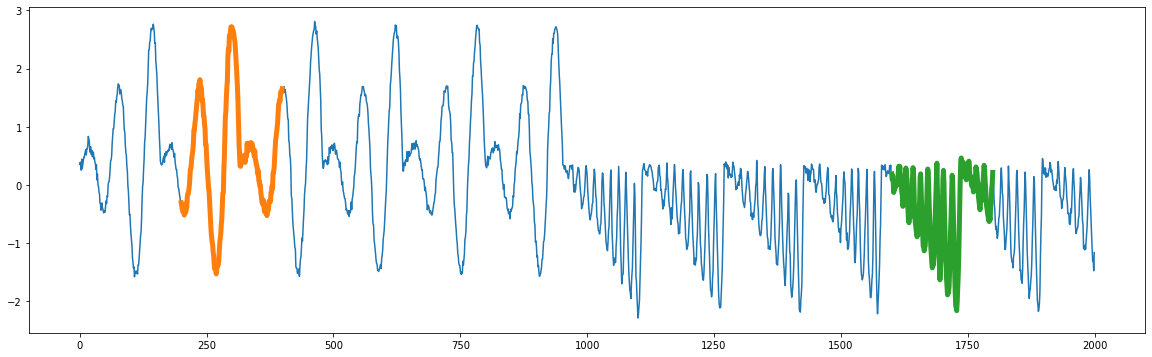

In [11]:
plt.plot(T)
for i in range(k):
    idx = indices[i]
    plt.plot(range(idx, idx + m), T[idx : idx + m], lw=5)
plt.show()

In [12]:
snippets, indices, profiles, fractions, areas = stumpy.snippets(T, m, k=9, s=s)

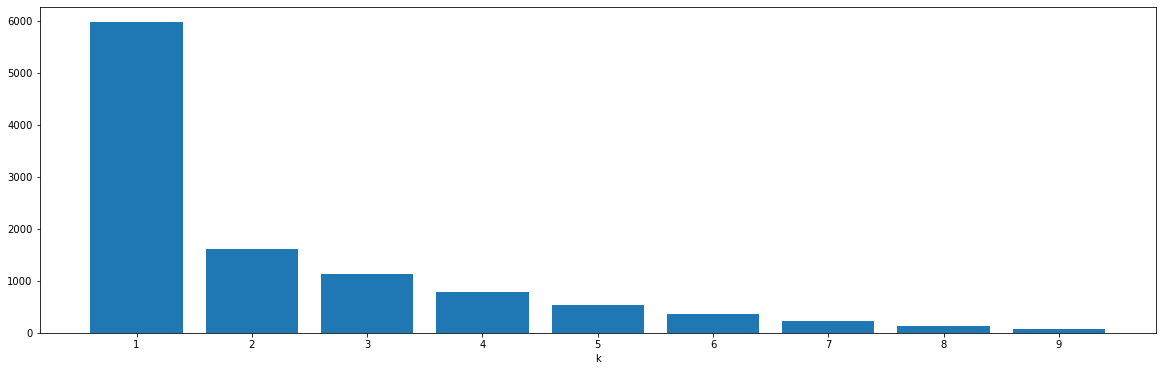

In [13]:
plt.bar(range(1, 10), areas, tick_label=range(1,10))
plt.xlabel("k")
plt.show()

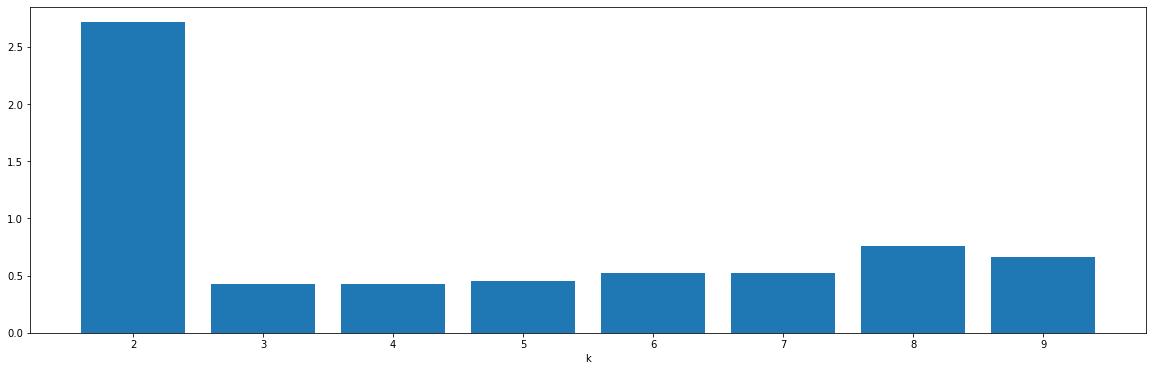

In [14]:
plt.bar(range(2, 10), areas[:-1]/areas[1:] - 1.0, tick_label=range(2,10))
plt.xlabel("k")
plt.show()